In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
raw_df = pd.read_csv("weatherAUS.CSV")
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#drop all null values from dataframe[RainTomorrow]
raw_df.dropna(subset = ["RainTomorrow"], inplace = True)

In [5]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


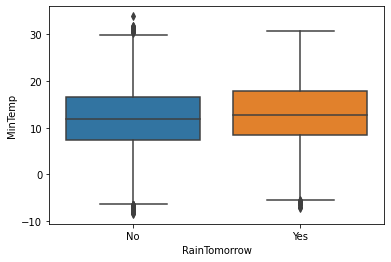

In [6]:
sns.boxplot(data=raw_df,y="MinTemp",x="RainTomorrow")
plt.show()

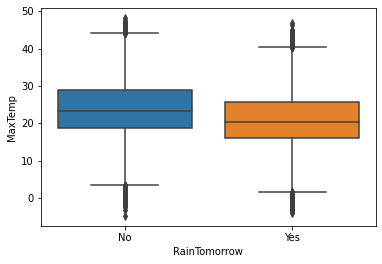

In [7]:
sns.boxplot(data=raw_df,y="MaxTemp",x="RainTomorrow")
plt.show()

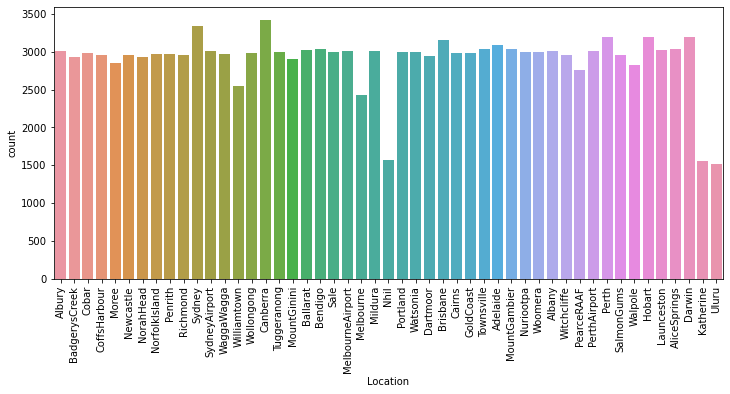

In [8]:
plt.rcParams["figure.figsize"] = (12,5)
warnings.filterwarnings("ignore")
sns.countplot('Location',data=raw_df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

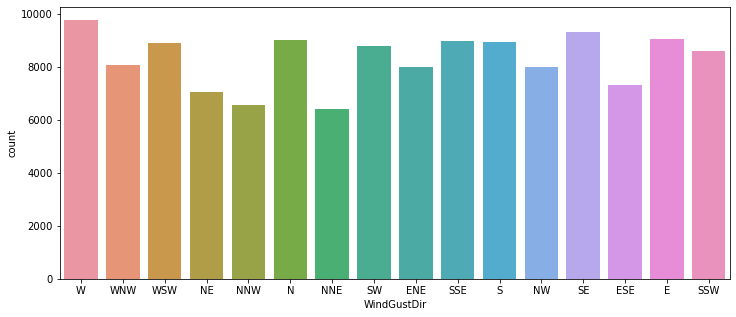

In [9]:
sns.countplot('WindGustDir',data=raw_df)

<AxesSubplot:xlabel='Sunshine', ylabel='Count'>

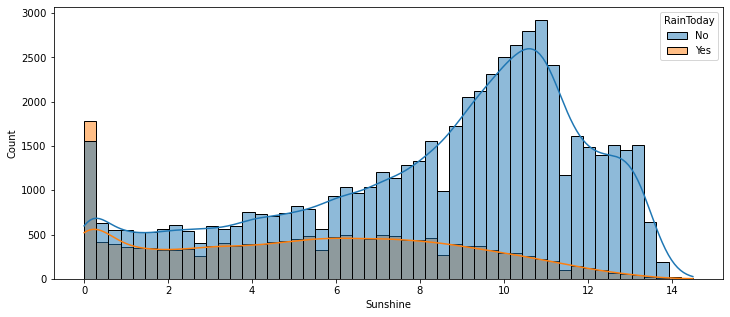

In [10]:
sns.histplot(data=raw_df, x="Sunshine",kde=True,bins=50,hue='RainToday')

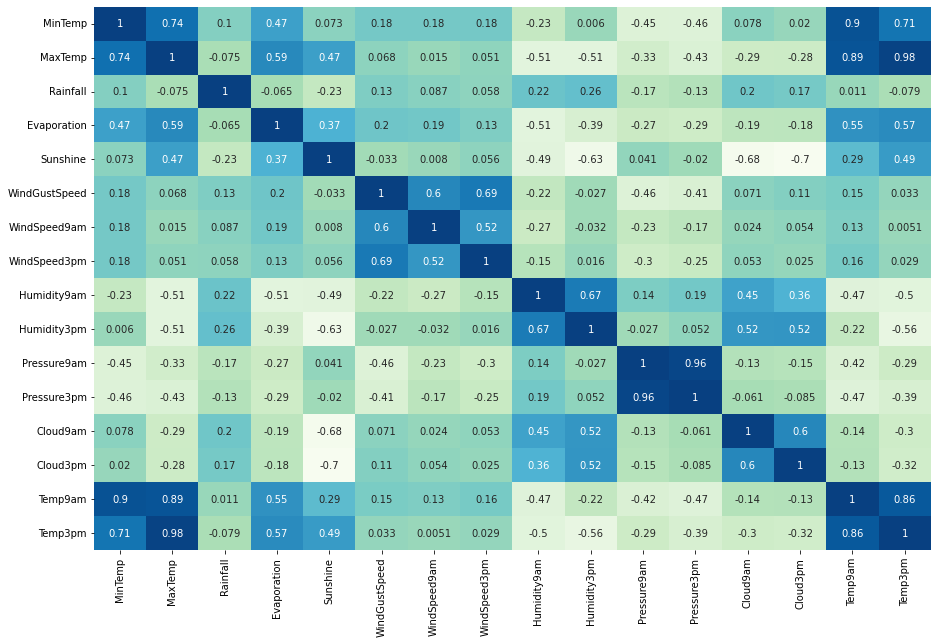

In [11]:
fig_3=plt.figure(figsize=(15,10))
sns.heatmap(raw_df.corr(), annot=True, cbar=False, cmap="GnBu")
plt.show()

In [12]:
raw_df.isna().sum().sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Date                 0
Location             0
RainTomorrow         0
dtype: int64

In [13]:
#Fetching numeric columns from the dataset
numeric_cols = raw_df.select_dtypes(include = np.number).columns.to_list()
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
#Fetching categorical or string columns from the dataset
categorical_cols = raw_df.select_dtypes('object').columns.to_list()
print(categorical_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
imputer = SimpleImputer(strategy = "mean").fit(raw_df[numeric_cols])

In [16]:
#apply the mean imputing strategy on numerical columns of raw_df
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

In [17]:
raw_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [18]:
raw_df[categorical_cols].isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [19]:
raw_df[categorical_cols] = raw_df[categorical_cols].fillna("unknown")

In [20]:
raw_df[categorical_cols].isna().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [21]:
raw_df["year"] = pd.to_datetime(raw_df.Date).dt.year;
raw_df["month"] = pd.to_datetime(raw_df.Date).dt.month;
raw_df["day"] = pd.to_datetime(raw_df.Date).dt.day;

In [22]:
raw_df.drop(columns = ["Date"], inplace = True)

In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [24]:
numeric_cols = raw_df.select_dtypes(include = np.number).columns.to_list()
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [25]:
#Fetching categorical or string columns from the dataset
categorical_cols = raw_df.select_dtypes('object').columns.to_list()
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [26]:
train_df = raw_df[raw_df["year"] < 2015]
validate_df = raw_df[raw_df["year"] == 2015]
test_df = raw_df[raw_df["year"] > 2015]

In [27]:
print("Shape of train dataset", train_df.shape)
print("Shape of validation dataset", validate_df.shape)
print("Shape of test dataset", test_df.shape)

Shape of train dataset (98988, 25)
Shape of validation dataset (17231, 25)
Shape of test dataset (25974, 25)


In [28]:
# Let us seperate input and target columns 
#Seperating target columns and dropping it from train, validate and test dataframes
train_target = train_df["RainTomorrow"]
train_df.drop(columns = ["RainTomorrow"], inplace = True)

validate_target = validate_df["RainTomorrow"]
validate_df.drop(columns = ["RainTomorrow"], inplace = True)


test_target = test_df["RainTomorrow"]
test_df.drop(columns = ["RainTomorrow"], inplace = True)
warnings.filterwarnings("ignore")

In [29]:
#Separating input columns
train_inputs = train_df.copy()
validate_inputs = validate_df.copy()
test_inputs = test_df.copy()

In [30]:
print("Shape of Train input", train_inputs.shape)
print("Shape of Validate input", validate_inputs.shape)
print("Shape of Test input", test_inputs.shape)

Shape of Train input (98988, 24)
Shape of Validate input (17231, 24)
Shape of Test input (25974, 24)


In [31]:
print("Shape of Train targer", train_target.shape)
print("Shape of Validate target", validate_target.shape)
print("Shape of Test target", test_target.shape)

Shape of Train targer (98988,)
Shape of Validate target (17231,)
Shape of Test target (25974,)


In [32]:
#Fetch numerical columns
numeric_cols = train_df.select_dtypes(include = np.number).columns.to_list()
print("Numerical columns", numeric_cols)

#Fetching categorical or string columns from the dataset
categorical_cols = train_df.select_dtypes('object').columns.to_list()
print("Categorical columns", categorical_cols)

Numerical columns ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']
Categorical columns ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [33]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [34]:
#Fetch new columns which will be created as a part of OneHotEncoding operation
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [35]:
#Transform categorical cols for train, test and validation dataset
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
validate_inputs[encoded_cols] = encoder.transform(validate_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [36]:
print("Shape of training dataset", train_inputs.shape)
print("Shape of validation dataset", validate_inputs.shape)
print("Shape of test dataset", test_inputs.shape)

Shape of training dataset (98988, 127)
Shape of validation dataset (17231, 127)
Shape of test dataset (25974, 127)


In [37]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_validate = validate_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [38]:
rfc=RandomForestClassifier (n_jobs = 1, random_state = 42)

In [39]:
%%time
rfc.fit(X_train, train_target)

Wall time: 33.6 s


RandomForestClassifier(n_jobs=1, random_state=42)

In [40]:
print("Training accuracy = ", rfc.score(X_train, train_target) * 100, "%")

Training accuracy =  99.99595910615429 %


In [41]:
print("Validation accuracy = ", rfc.score(X_validate, validate_target) * 100, "%")

Validation accuracy =  85.58412164122802 %


In [42]:
print("Test accuracy = ", rfc.score(X_test, test_target) * 100, "%")

Test accuracy =  84.45368445368445 %


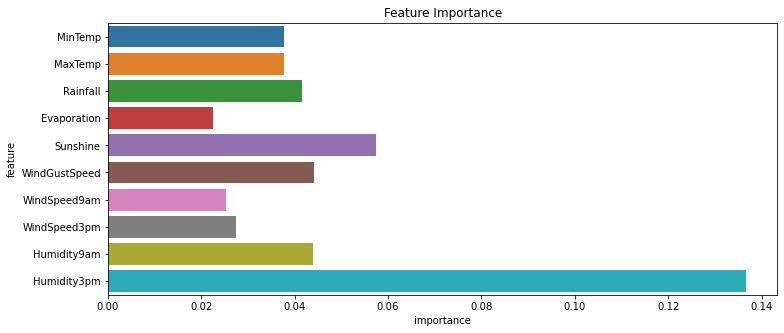

In [43]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfc.feature_importances_
})
plt.title('Feature Importance')
sns.barplot(data = importance_df.head(10), x='importance', y='feature');